Credit: https://github.com/pinecone-io/examples/blob/master/learn/analytics-and-ml/data-mining/sentiment-analysis/sentiment-analysis.ipynb

In [127]:
!pip install sentence_transformers pinecone-client==3.1.0 datasets seaborn matplotlib


In [128]:
import pandas as pd

file_path = 'REVIEWS_1.csv'
df = pd.read_csv(file_path)
df.head()

,ID,Review,Rating,AUTHOR,TITLE
0,1,I don't get all the terrible reviews for this ...,5.0,margarida-44311,Not Bad\n
1,2,I cannot believe anyone could give this film l...,8.0,joemay-2,What are all the bad reviews about is it a wo...
2,3,Great White is not the worst way to spend 90 m...,4.0,nebk,Great White=Jaws Lite\n
3,4,Great White is as basic of a killer shark film...,4.0,kuarinofu,Bare-bones killer shark film\n
4,5,"Terrible story, dialogue and CGI. The film has...",4.0,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n"


In [129]:
import torch

# set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [130]:
labels = {
    "LABEL_0": "Bad",
    "LABEL_1": "Neutral",
    "LABEL_2": "Good"
}

In [131]:
from transformers import (
    pipeline,
    AutoTokenizer,
    AutoModelForSequenceClassification
    )

model_id = "cardiffnlp/twitter-roberta-base-sentiment"

# load the model from huggingface
model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=3
)

# load the tokenizer from huggingface
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.model_max_length = 514

# from tensorflow.keras.preprocessing.text import Tokenizer
# tok = Tokenizer(char_level=False,split=' ')
# tok.fit_on_texts(xtrain)


# load the tokenizer and model into a sentiment analysis pipeline
nlp = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=device
    )


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [132]:
print(df.columns)
test_review = df["Review"][100]
test_review

Index(['ID', 'Review', 'Rating', 'AUTHOR', 'TITLE'], dtype='object')


'Perfect thriller! Yes, it could have been better. The beginning was kind of sour; no back story and all of that. I think the latter part of the movie made up for it. I would definitely watch it again if I have to!'

In [133]:
nlp(test_review)

[{'label': 'LABEL_2', 'score': 0.8000969886779785}]

In [134]:
def rating(score): #1-4 bad, 5-6 neutral, 7-10 good
  if score > 6:
      return 'Good'
  elif score >= 5 and score <= 6:
      return 'Neutral'
  else:
      return 'Bad'

# for i in range(1,11):
#   print(i, rating(i))

df['Rating'] = df['Rating'].apply(rating)
df.head()

,ID,Review,Rating,AUTHOR,TITLE
0,1,I don't get all the terrible reviews for this ...,Neutral,margarida-44311,Not Bad\n
1,2,I cannot believe anyone could give this film l...,Good,joemay-2,What are all the bad reviews about is it a wo...
2,3,Great White is not the worst way to spend 90 m...,Bad,nebk,Great White=Jaws Lite\n
3,4,Great White is as basic of a killer shark film...,Bad,kuarinofu,Bare-bones killer shark film\n
4,5,"Terrible story, dialogue and CGI. The film has...",Bad,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n"


In [135]:
# import nltk
# from nltk.corpus import stopwords
# from string import punctuation
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('wordnet')

In [136]:
# def clean_text(text):
#     stop = stopwords.words('english')
#     punc = list(punctuation)
#     bad_tokens = stop + punc
#     lemma = WordNetLemmatizer()
#     tokens = word_tokenize(text)
#     word_tokens = [t for t in tokens if t.isalpha()]
#     clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
#     return " ".join(clean_token)

In [137]:
#df['Review'] = df['Review'].apply(clean_text)
#df.head()

In [138]:
# sent_len = []
# for sent in df['Review']:
#     sent_len.append(len(word_tokenize(sent)))
# df['sent_len'] = sent_len
# df.head()

# import numpy as np
# np.quantile(sent_len,0.95)
# print(df['sent_len'].value_counts())

In [139]:
def truncate_text(text, max_length):
    encoded_input = tokenizer.encode_plus(
        text,
        max_length=max_length,
        truncation=True,
        return_tensors='pt'
    )
    return tokenizer.decode(encoded_input['input_ids'][0], skip_special_tokens=True)

# evaluate
predictions, true_vals = [], []
counter = 0
df_copy = df.head(360).copy()
# Subset of data, about 1/15th
for row in df_copy[['Review', 'Rating']].itertuples():
  if pd.isnull(row.Review) or pd.isnull(row.Rating):
    continue
  try:
      # truncated_review = truncate_text(row.Review, tokenizer.model_max_length)
      classified = nlp(row.Review)
      predictions.append(labels[classified[0]['label']])
      true_vals.append(row.Rating)
      counter += 1
      print(counter/len(df_copy))
  except Exception as e:
      print(f"Error processing row: {e}")
      print(len(row.Review))
      continue



0.002777777777777778
0.005555555555555556
0.008333333333333333
0.011111111111111112
0.013888888888888888
0.016666666666666666
0.019444444444444445
0.022222222222222223
0.025
0.027777777777777776
0.030555555555555555
0.03333333333333333
0.03611111111111111


Token indices sequence length is longer than the specified maximum sequence length for this model (911 > 514). Running this sequence through the model will result in indexing errors


0.03888888888888889
0.041666666666666664
Error processing row: The expanded size of the tensor (911) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 911].  Tensor sizes: [1, 514]
4025
0.044444444444444446
0.04722222222222222
0.05
0.05277777777777778
0.05555555555555555
0.058333333333333334
0.06111111111111111
0.06388888888888888
0.06666666666666667
0.06944444444444445
0.07222222222222222
0.075
0.07777777777777778
0.08055555555555556
0.08333333333333333
0.08611111111111111
0.08888888888888889
0.09166666666666666
0.09444444444444444
0.09722222222222222
0.1
0.10277777777777777
0.10555555555555556
0.10833333333333334
0.1111111111111111
0.11388888888888889
0.11666666666666667
0.11944444444444445
0.12222222222222222
0.125
0.12777777777777777
0.13055555555555556
0.13333333333333333
0.1361111111111111
0.1388888888888889
0.14166666666666666
0.14444444444444443
0.14722222222222223
0.15
0.1527777777777778
0.15555555555555556
0.15833333333333333
0.16111111111111

In [140]:
from sklearn.metrics import classification_report
print(classification_report(predictions, true_vals))

              precision    recall  f1-score   support

         Bad       0.83      0.79      0.81       185
        Good       0.74      0.80      0.77       118
     Neutral       0.21      0.20      0.20        45

    accuracy                           0.72       348
   macro avg       0.59      0.60      0.59       348
weighted avg       0.72      0.72      0.72       348



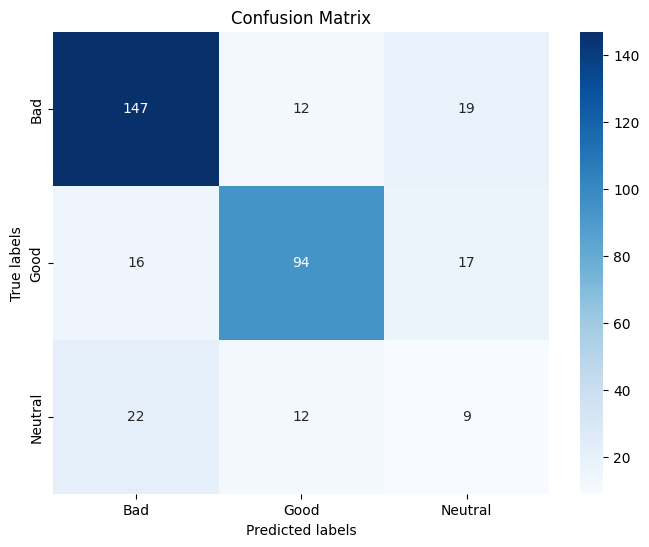

In [141]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predictions and true_vals are your lists of predicted and true labels
# Replace predictions and true_vals with your actual variables
# Also, make sure your labels are ordered consistently (e.g., ['Bad', 'Good', 'Neutral'])

# Get the confusion matrix
conf_matrix = confusion_matrix(true_vals, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good', 'Neutral'],
            yticklabels=['Bad', 'Good', 'Neutral'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()